In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datapath = './figdata'

with xr.open_dataset(datapath+'/CESM2.TREFHT.nc') as ds:
    trefht = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.PRECT.nc') as ds:
    prect = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.T_p19.nc') as ds:
    t = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.U_p19.nc') as ds:
    u = {k:ds[k] for k in ds.data_vars}

with xr.open_dataset(datapath+'/CESM2.TREFHTstd.nc') as ds:
    trefht_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.PRECTstd.nc') as ds:
    prect_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.T_p19std.nc') as ds:
    t_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.U_p19std.nc') as ds:
    u_std = {k:ds[k] for k in ds.data_vars}

In [3]:
exps = [exp for exp in trefht if (('JJA' not in exp) and ('DJF' not in exp))]
exps

['C_ref', 'C_cnt', 'C_20', 'W_ref', 'W_cnt', 'W_20']

In [4]:
exps_diff = [
    ['C_cnt','C_ref'],
    ['C_20','C_ref'],
    ['C_20','C_cnt'],
    ['W_cnt','W_ref'],
    ['W_20','W_ref'],
    ['W_20','W_cnt']
]

## 2m temperature

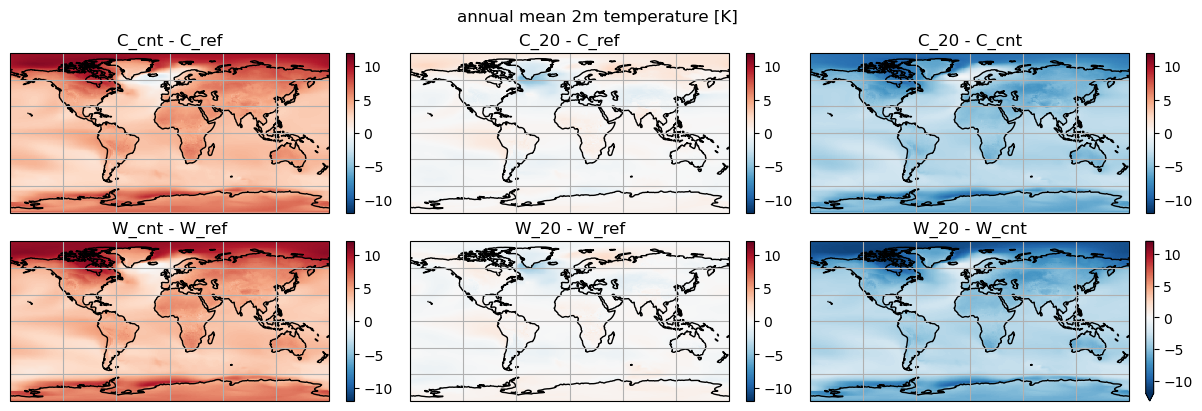

In [5]:
var = trefht

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual mean 2m temperature [K]")
for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-12, vmax=12, cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.coastlines()
    ax.gridlines()

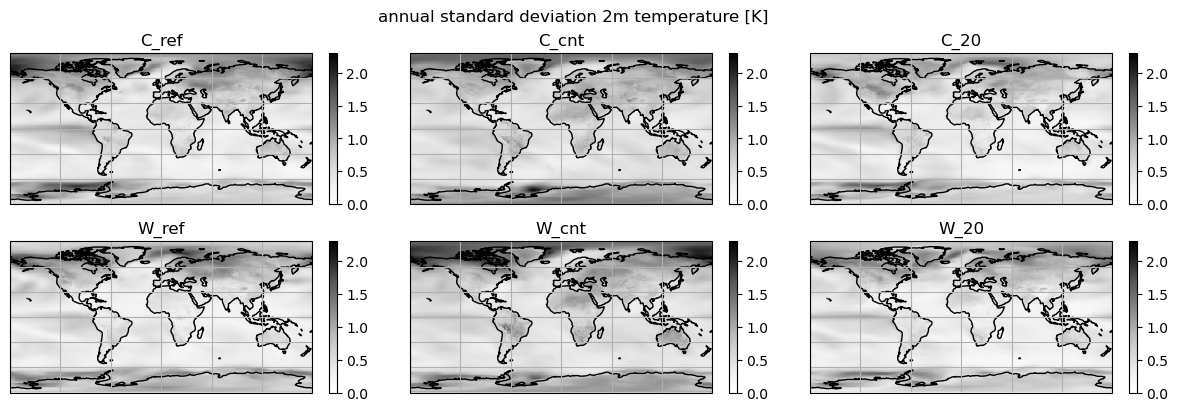

In [6]:
var = trefht_std

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual standard deviation 2m temperature [K]")
for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greys', vmin=0, vmax=2.3, cbar_kwargs={'label':''})
    ax.set_title(exp)
    ax.coastlines()
    ax.gridlines()

## precipitation

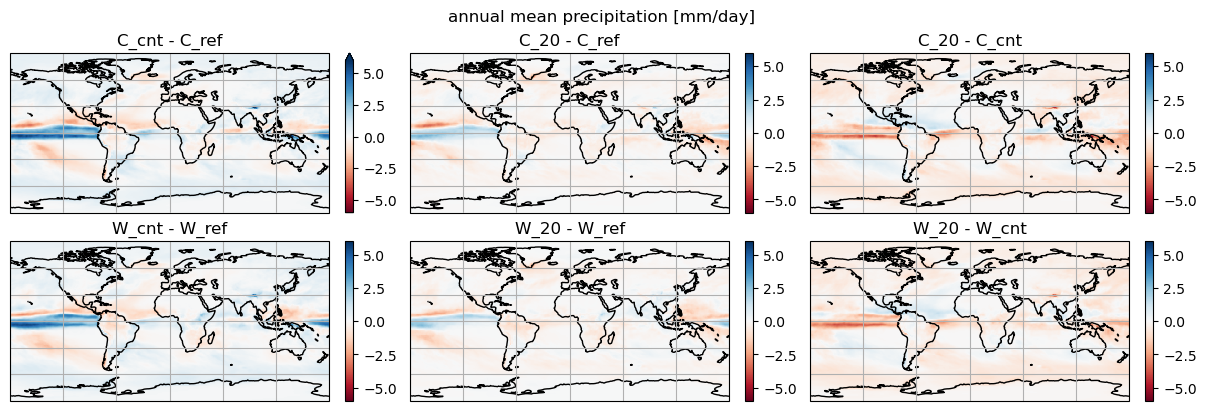

In [7]:
var = prect

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual mean precipitation [mm/day]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-6, vmax=6, cmap='RdBu')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.coastlines()
    ax.gridlines()

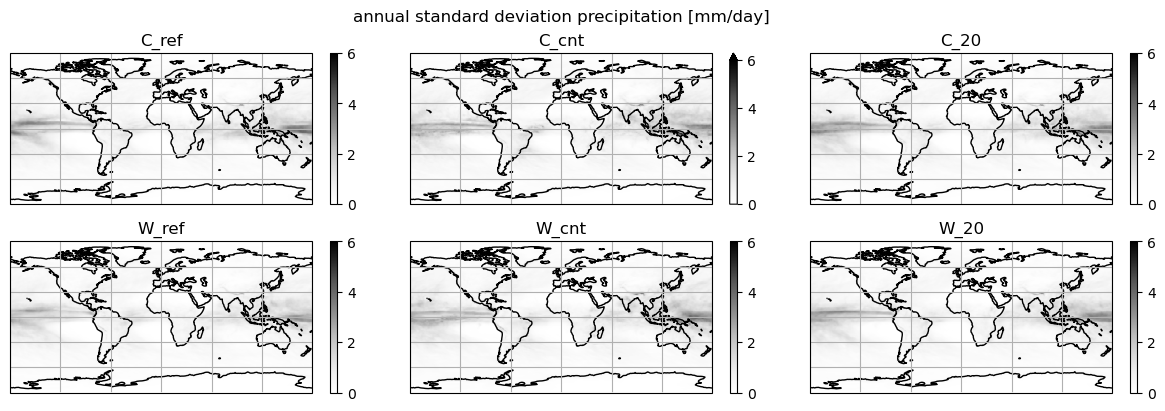

In [8]:
var = prect_std

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual standard deviation precipitation [mm/day]")
for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greys', vmin=0, vmax=6, cbar_kwargs={'label':''})
    ax.set_title(exp)
    ax.coastlines()
    ax.gridlines()

## zonal mean temperature

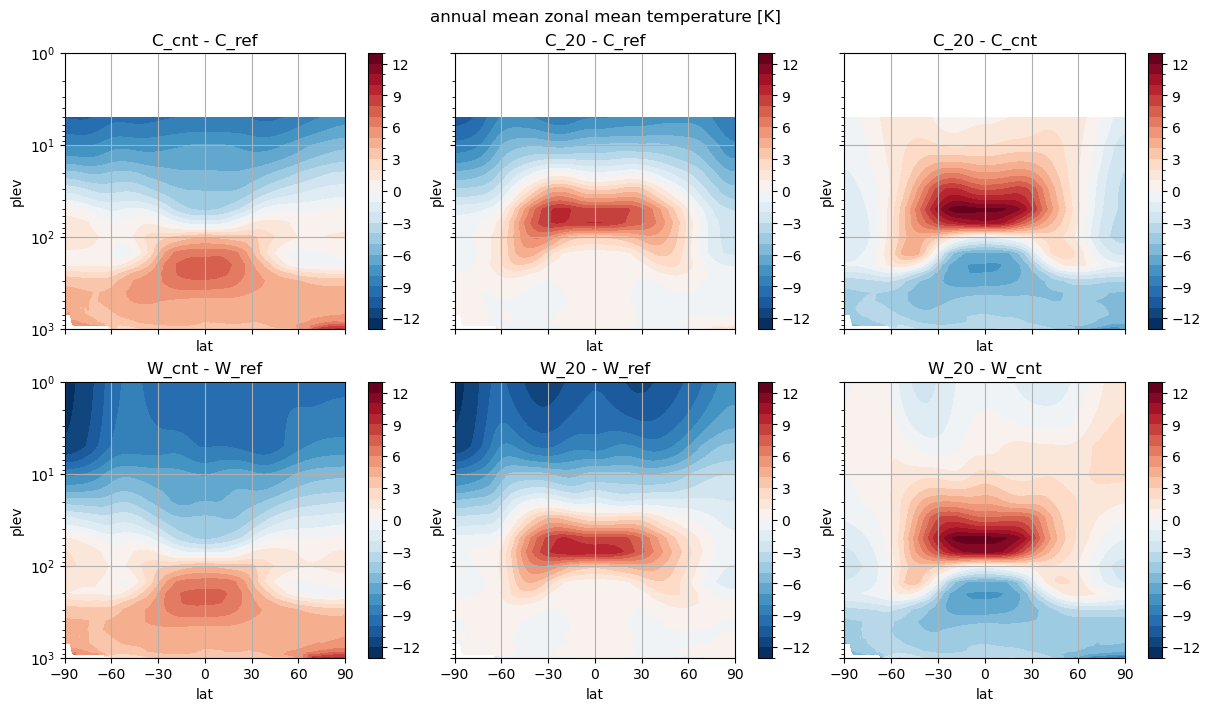

In [9]:
var = t

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual mean zonal mean temperature [K]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=range(-13,14), cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.grid()

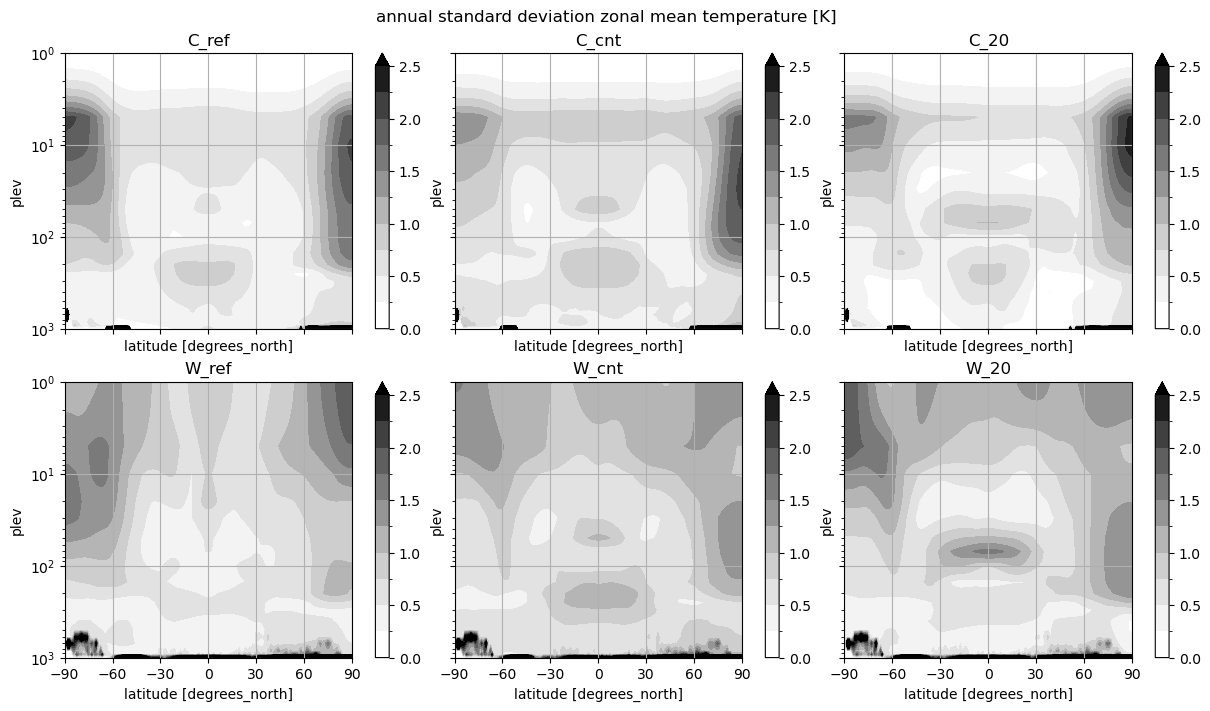

In [10]:
var = t_std

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual standard deviation zonal mean temperature [K]")

for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=np.arange(0,2.51,0.25), cbar_kwargs={'label':''}, cmap='Greys')
    ax.set_title(exp)
    ax.grid()

## zonal mean zonal wind

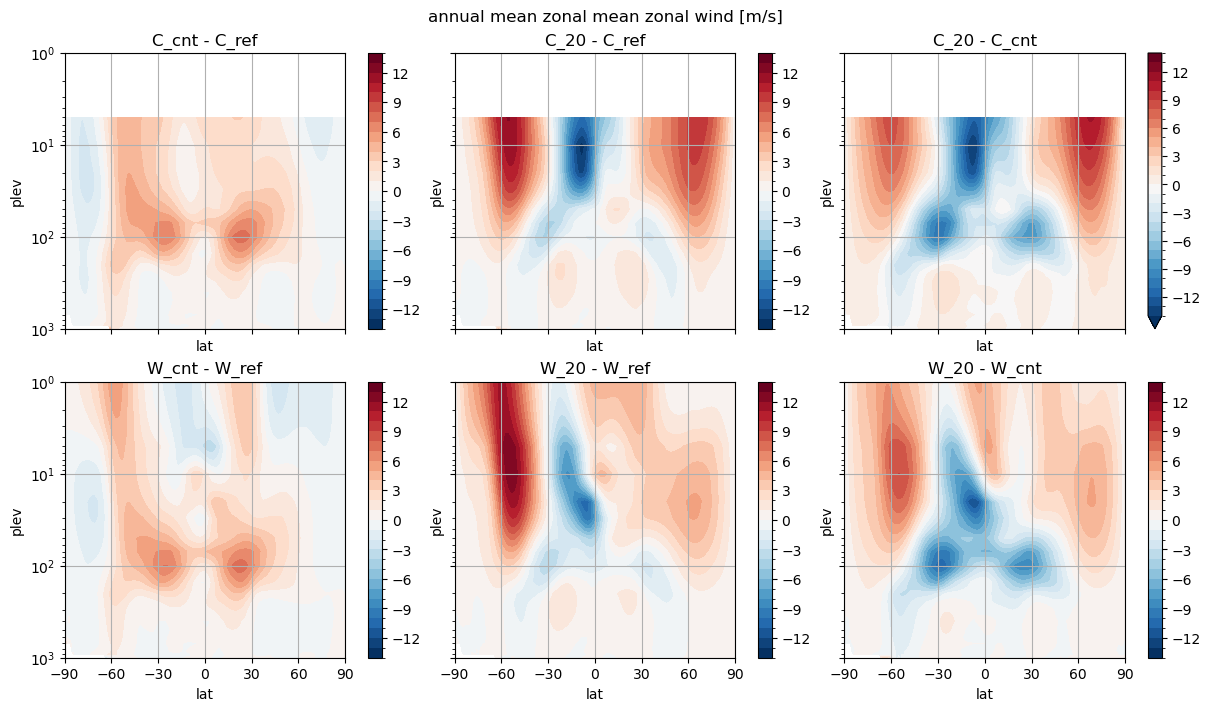

In [11]:
var = u

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual mean zonal mean zonal wind [m/s]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=range(-14,15), cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.grid()

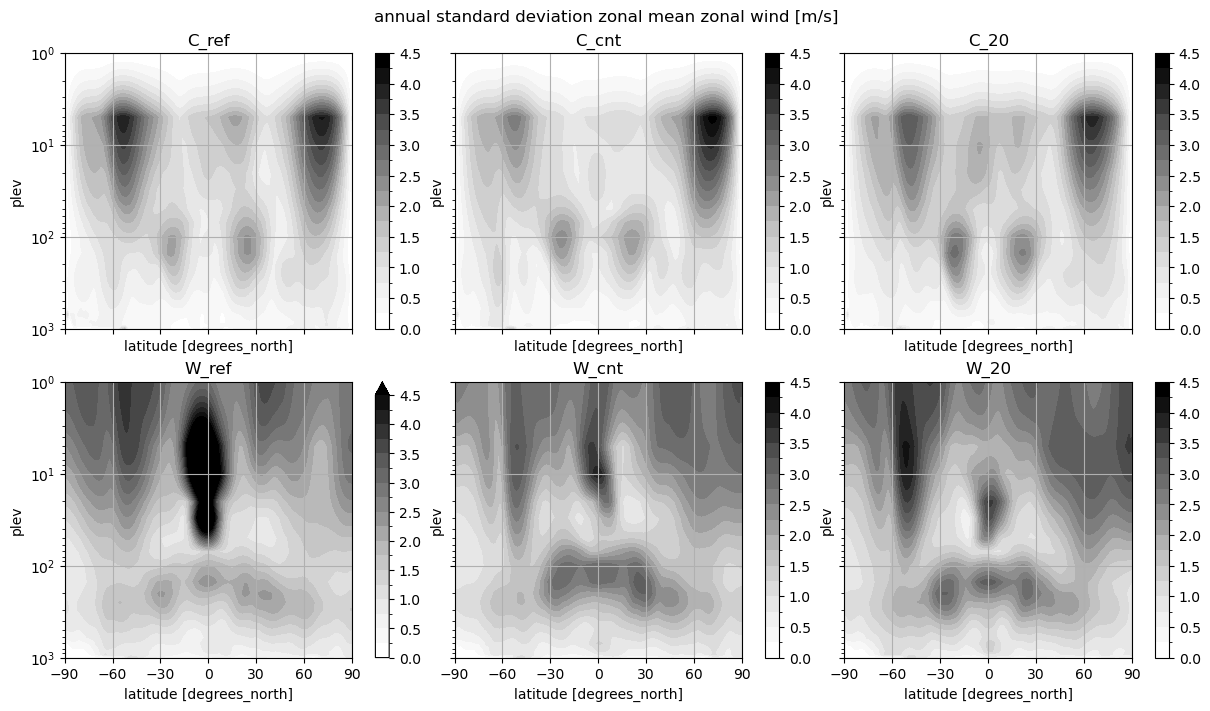

In [12]:
var = u_std

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual standard deviation zonal mean zonal wind [m/s]")

for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=np.arange(0,4.6,0.25), robust=True, cbar_kwargs={'label':''}, cmap='Greys')
    ax.set_title(exp)
    ax.grid()